Tự biến đổi lại gini score, gini index và cách xây dựng cây decision tree
Code hàm tìm ra ngưỡng chia tốt nhất cho 1 node với data sample

Code hàm xây dựng model với data sample
Vẽ decision boundary cho data sample với model trên
Dùng code xây dựng model cho data, https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv, vẽ đường decision boundary tương ứng.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
name_replacement = {'Lương': 'salary', 'Thời gian làm việc': 'worktime', 'Cho vay': 'rented'}
data = data.rename(columns = name_replacement)
data

,salary,worktime,rented
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


Text(0, 0.5, 'worktime')

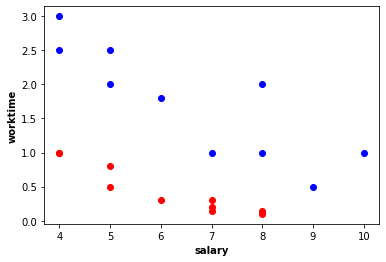

In [3]:
rented = data[data['rented'] == 1]
not_rented = data[data['rented'] == 0]

fig, ax = plt.subplots()
plt.scatter('salary', 'worktime', data=rented, c = 'b')
plt.scatter('salary', 'worktime', data=not_rented,c = 'r')

ax.set_xlabel('salary', fontweight ='bold')
ax.set_ylabel('worktime', fontweight ='bold')

In [4]:
def gini(n1, n2):
    if n1 + n2 == 0:
        return 1
    return 1 - (n1/(n1 + n2))**2 - (n2/(n1 + n2))**2

In [5]:
g1 = gini(10,10)
g1

0.5

In [8]:
data_length = len(data)
data_length

20

In [9]:
stop = 1e-2
result = {}

for i in range (3, max(data.salary) + 1, 1):
    salary_bigger_than_i = data[data['salary'] >= i]
    salary_smaller_than_i = data[data['salary'] < i]

    positive = len(salary_bigger_than_i)
    rent = len(salary_bigger_than_i[salary_bigger_than_i['rented'] == 1])
    not_rent = data_length - rent
    positive_gini = gini(rent, not_rent)

    negative = len(salary_smaller_than_i)
    rent = len(salary_smaller_than_i[salary_smaller_than_i['rented'] == 1])
    not_rent = data_length - rent
    negative_gini = gini(rent, not_rent)

    gini_score = positive * positive_gini / length_data + negative * negative_gini / length_data
    print(g1)
    print(gini_score)

    result[f'{i}'] = g1 - gini_score  

print(result)

max_threshold = max(result, key=result.get)

max_threshold

0.5
0.5
0.5
0.5
0.5
0.42
0.5
0.38
0.5
0.375
0.5
0.39
0.5
0.45000000000000007
0.5
0.475
{'3': 0.0, '4': 0.0, '5': 0.08000000000000002, '6': 0.12, '7': 0.125, '8': 0.10999999999999999, '9': 0.04999999999999993, '10': 0.025000000000000022}


'7'